In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

If the spline function is:

$$\mathbf{p}\left(t\right):\Re^1 \to \Re^n$$

The length is given by

$$\int_0^1 \sqrt{{p_1'(t)}^2 + {p_2'(t)}^2 + \cdots + {p'_n(t)}^2} dt$$

Or simply

$$\int_0^1 \sqrt{\mathbf{p'}(t)^T{\mathbf{p'}(t)}} \; dt$$

Taking the most simple case as example, where the length should be equal to $\sqrt{3}$

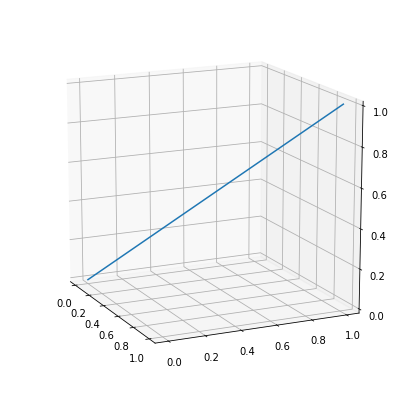

In [2]:
X = np.array(
    [[0.0, 0.0, 0.0],
     [1.0, 1.0, 1.0]]
)
t = np.linspace(0,1,X.shape[0])
cs = CubicSpline(t,X)

XX = cs(np.linspace(0,1,2))
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(XX[:,0], XX[:,1], XX[:,2])
ax.view_init(15,-25)
plt.show()

Ir order to implement the length computation, ```scipy.integrate.quad``` is used:

In [3]:
grad_cs = cs.derivative()
def f(t):
    return sqrt(np.dot(grad_cs(t),grad_cs(t)))
from scipy.integrate import quad
lenght = quad(f,0,1)[0]
print(lenght)

1.7320508075688772


In [4]:
print(np.allclose(lenght, sqrt(3.0)))

True


For convenience, this is encapsulated in a function taking a cubic spline as parameter

In [5]:
def spline_length(cubic_spline):
    grad_cs = cs.derivative()
    return quad(lambda t: sqrt(np.dot(grad_cs(t),grad_cs(t))), 0 ,1)[0]

In [6]:
spline_length(cs)

1.7320508075688772

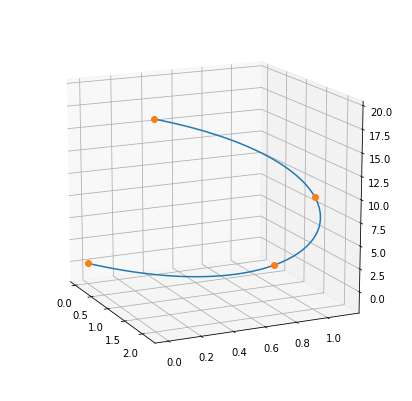

length is: 24.28607464792521


In [7]:
X = np.array(
    [[0.0, 0.0, 0.0],
     [1.0, 1.0, 0.0],
     [2.0, 1.0, 10.0],
     [2.0, 0.0, 20.0],
    ]
)
t = np.linspace(0,1,X.shape[0])
cs = CubicSpline(t,X)
XX = cs(np.linspace(0,1,100))
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(XX[:,0], XX[:,1], XX[:,2])
ax.plot(X[:,0], X[:,1], X[:,2],'o')
ax.view_init(15,-25)
plt.show()
print('length is:', spline_length(cs))